In [49]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import cm

from torch.utils.data import Dataset,ConcatDataset,DataLoader
from torch import nn, optim
import torch 
import copy
from sklearn.model_selection import train_test_split

from torchvision import transforms
import timm 
import timm.optim
from timm.data.transforms_factory import create_transform
from torch.optim import lr_scheduler
import os

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
class confiFile():
    """Configuration class for easy parametrization"""
    
    #Pretrained model with timm
    model = 'resnet10t'
    epochs = 2
    
    in_chans = 3
    num_classes = 10
    learning_rate = 1e-3
    
    val_size = 0.3
    batch_size = 8
    
CFG = confiFile()

In [31]:
# -*- coding: utf-8 -*-
import click
import logging
import os
import torch
from torchvision import transforms
from torchvision.datasets import CIFAR10

ROOT_PATH = ""
pp = os.path.dirname(os.path.dirname(os.getcwd()))
DATA_PATH_RAW_TRAIN = pp+r"\data\raw\train"
DATA_PATH_RAW_VAL = pp+r"\data\raw\val"

DATA_PATH_PROC_TRAIN = pp+r'\data\processed\train'
DATA_PATH_PROC_VAL = pp+r'\data\processed\val'
# @click.command()
#@click.argument('input_filepath', default=ROOT_PATH + '/data/raw', type=click.Path(exists=True))
#@click.argument('output_filepath', default=ROOT_PATH + '/data/processed', type=click.Path())
def main(input_filepath=ROOT_PATH+'/data/raw', output_filepath=ROOT_PATH+'/data/processed'):

    """ Runs data processing scripts to turn raw data from (../raw) into
        cleaned data ready to be analyzed (saved in ../processed).
    """
    logger = logging.getLogger(__name__)
    logger.info('making final data set from raw data')


    # Define a transform to normalize the data
    transformer = transforms.Compose([transforms.ToTensor(),
                                      transforms.Normalize((0.5, ), (0.5, ),(0.5,))])
    # define the two dataloaders for the training and validation set 
    
    dataloader_train = CIFAR10(root=DATA_PATH_RAW_TRAIN, download=True,transform=transformer,train=True)
    dataloader_val = CIFAR10(root=DATA_PATH_RAW_VAL,download=True, transform=transformer,train=False)
    
    # save the training set and corresponding labels to tensors in processed directory 
    images = []
    labels = []
    for image,label in dataloader_train:
        #print(y)
        images.append(image)
        labels.append(label)
    images = torch.stack(images, dim=0)
    labels = torch.FloatTensor(labels)
    torch.save(images, DATA_PATH_PROC_TRAIN+'\images.pt')
    print("image save complete")
    torch.save(labels, DATA_PATH_PROC_TRAIN+'\labels.pt')
    print("labels save complete")
    
#     # save the trvalidation set and corresponding labels to tensors in processed directory 
#     images = []
#     labels = []
#     for image,label in dataloader_val:
#         #print(y)
#         images.append(image)
#         labels.append(label)
#     images = torch.stack(images, dim=0)
#     labels = torch.FloatTensor(labels)
#     torch.save(images, DATA_PATH_PROC_VAL+'\images.pt')
#     torch.save(labels, DATA_PATH_PROC_VAL+'\labels.pt')
        
    return dataloader_train, dataloader_val,images,labels # train_set, test_set

dataloader_train, dataloader_val,images, labels= main()
# print('-----------------------------')




Files already downloaded and verified
Files already downloaded and verified
image save complete
labels save complete


In [35]:
images.shape

torch.Size([50000, 3, 32, 32])

In [32]:
_train, _val = train_test_split(dataloader_train, test_size = .3, \
                                                  random_state = 666)

In [42]:
train_loader_cifar10 = DataLoader(_train, batch_size  = CFG.batch_size,  shuffle = True)
val_loader_cifar10 = DataLoader(_val, batch_size  = CFG.batch_size,  shuffle = True)
for epoch in range(1):
    for i, data in enumerate(val_loader_cifar10, 0):
        # get the inputs
        inputs, labels = data
        labels = labels.reshape(-1,1)
        inputs = np.array(inputs)
        print("i:",i, " input: ", inputs.shape, " labels: ", labels.shape)

i: 0  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 2  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 3  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 4  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 5  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 6  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 7  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 8  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 9  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 10  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 11  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 12  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 13  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 14  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 15  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 16  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 17  

i: 1423  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1424  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1425  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1426  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1427  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1428  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1429  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1430  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1431  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1432  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1433  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1434  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1435  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1436  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1437  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1438  input:  (8, 3, 32, 32)  labels:  torch.Size([8, 1])
i: 1439  input:  (8, 3, 

In [40]:
# fig, ax = plt.subplots(nrows = 2, ncols = 5,  figsize = (15,8))
# for i in range(5):
# #     image, y = images.__getitem__(i)
#     ax[0,i].imshow(images[i].squeeze(), cmap="magma") # Squeeze removes length (1,28,28) -> (28,28)
#     ax[0,i].set_title(int(y))
    
#     image, y = dataset_original.__getitem__(i)
#     ax[1,i].imshow(image.squeeze(), cmap="viridis") # Squeeze removes length (1,28,28) -> (28,28)
#     ax[1,i].set_title(int(y))

# ax[0,0].set_ylabel('Augmented Images',fontdict= {'fontsize':16})
# ax[1,0].set_ylabel('Original Images', fontdict= {'fontsize':16})

In [47]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Training Function
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
def train_(model, optmizer, loss_func, train_loader, device):
    """Function to train the model"""
    train_loss = 0.0
    train_correct = 0
    size_sampler = len(train_loader.sampler)
    
    for i, (images, labels) in enumerate(train_loader,0):
        
        # Pushing to device (cuda or CPU)
        images, labels = images.to(device), labels.to(device)
        
        #zeroing gradiants
        optmizer.zero_grad()
        
        #feedfoard
        y_hat = model(images)
        
        #Compute loss 
        loss = loss_func(y_hat, labels.long().squeeze())
        
        #Compute backpropagation
        loss.backward()
        
        #updating weights
        optmizer.step()
        
        # loss and correct values compute
        train_loss +=loss.item() * images.size(0)
        _ , pred = torch.max(y_hat.data, 1)
        train_correct +=sum(pred == labels.long().squeeze()).sum().item()
        
    return np.round(train_loss/size_sampler,4), np.round(train_correct*100./size_sampler,3)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Validation Function
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
def validation_(model, loss_func,val_loader, device):
    val_loss = 0.0
    val_correct = 0
    size_sampler = len(val_loader.sampler)
    with torch.no_grad():
        for i, (images, labels) in enumerate(val_loader):

            images, labels = images.to(device), labels.to(device)
            y_hat = model(images)
            loss = loss_func(y_hat, labels.long().squeeze())
            
            val_loss +=loss.item() * images.size(0)
            _ , pred = torch.max(y_hat.data, 1)
            val_correct +=(pred == labels.long().squeeze()).sum().item()
        
    return np.round(val_loss/size_sampler,4), np.round(val_correct*100./size_sampler,3)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Main Training
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

def train_model(model,optmizer, loss_func,scheduler, train_loader, val_loader, epochs, device, log = True):
    
    best_acc = 0
    
    
    print('Initializing Training...')
    
    history = {'train_loss':[], 'val_loss':[], 'train_acc':[], 'val_acc':[]}
    
    for i in range(epochs):
        
        train_loss, train_acc=  train_(model, optmizer, loss_func, train_loader,device)
        val_loss, val_acc = validation_(model, loss_func,val_loader, device)
        
        scheduler.step()
        
        if val_acc > best_acc:
            print(f'>> Saving Best Model with Val Acc: Old: {best_acc} | New: {val_acc}')
            best_model = copy.deepcopy(model)
            best_acc = val_acc
        
        
        if log and ((i+1)%2 == 0):
            print(f'> Epochs: {i+1}/{epochs} - Train Loss: {train_loss} - Train Acc: {train_acc} - Val Loss: {val_loss} - Val Acc: {val_acc}')
        
        #Saving infos on a history dict
        for key, value in zip(history, [train_loss,val_loss,train_acc,val_acc]):
            history[key].append(value)
    
    
    
    print('...End Training')
            
    return history,best_model
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Ploting graphics
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

def plot_history(history):
    
    #Ploting the Loss and Accuracy Curves
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (16,6))
    
    #Loss
    sns.lineplot(data = history['train_loss'], label = 'Training Loss', ax = ax[0])
    sns.lineplot(data = history['val_loss'], label = 'Validation Loss', ax = ax[0])
    ax[0].legend(loc = 'upper right')
    ax[0].set_title('Loss')
    #Accuracy
    sns.lineplot(data = history['train_acc'], label = 'Training Accuracy', ax = ax[1])
    sns.lineplot(data = history['val_acc'], label = 'Validation Accuracy', ax = ax[1])
    ax[1].legend(loc = 'lower right')
    ax[1].set_title('Accuracy')
        

Initializing Training...
>> Saving Best Model with Val Acc: Old: 0 | New: 66.287
>> Saving Best Model with Val Acc: Old: 66.287 | New: 69.747
> Epochs: 2/2 - Train Loss: 0.9402 - Train Acc: 68.534 - Val Loss: 0.9242 - Val Acc: 69.747
...End Training


NameError: name 'sns' is not defined

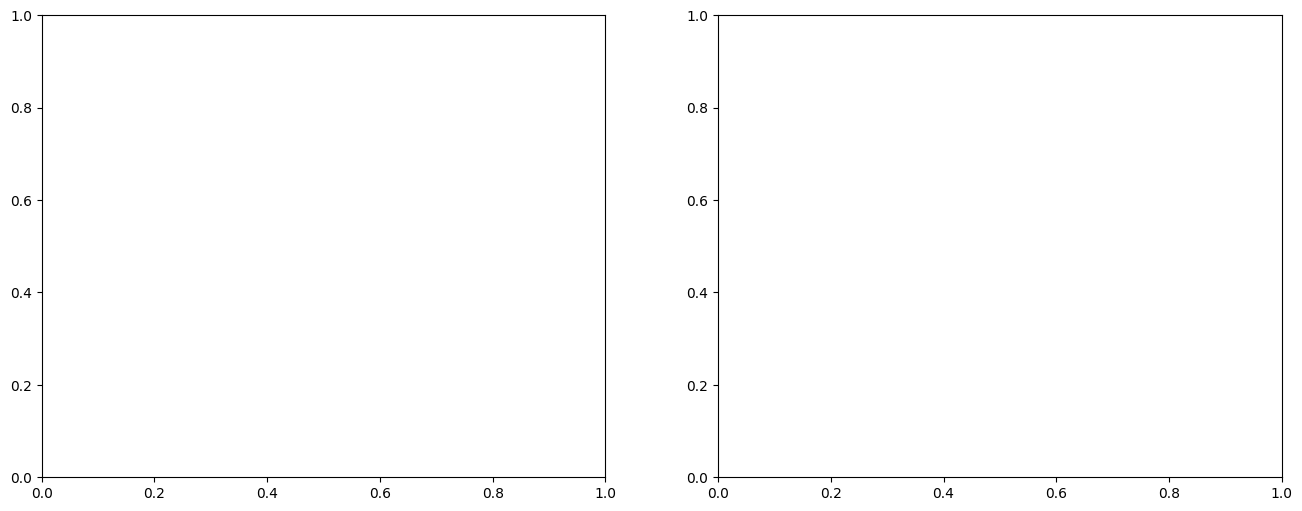

In [48]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# Execute training
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

model = timm.create_model(CFG.model, 
                          pretrained = True,
                          in_chans = CFG.in_chans, 
                          num_classes = CFG.num_classes)

model = model.to(device)

# # Same as using the model.fc (for resnet only) but easier as it can change in other models
# print(model.get_classifier())

# #checking the global pooling from timm
# print(model.global_pool)


optmizer = optim.Adam(model.parameters(), lr = CFG.learning_rate)
loss_func =  nn.CrossEntropyLoss()
scheduler = lr_scheduler.StepLR(optmizer, step_size=5, gamma=0.1)

history,best_model = train_model(model = model, 
                    optmizer = optmizer, 
                    loss_func = loss_func,
                    scheduler = scheduler,
                    train_loader = train_loader_cifar10,
                    val_loader = val_loader_cifar10,
                    epochs = CFG.epochs,
                    device = device)

#ploting results
plot_history(history)

In [59]:
timm.create_model('resnet10t', 
                          pretrained = True,
                          in_chans = CFG.in_chans, 
                          num_classes = CFG.num_classes)

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(24, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
   